# Import the Library, Select and clear the Data

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
sns.set()

In [3]:
Data_Car = pd.read_csv('house price.csv')
Data_Car.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#Checking the NaN Values 
Data_Car.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
#Checking the Duplicated 
Data_Car.duplicated().sum()
Data_Car.set_index('No',inplace=True)

In [6]:
Data_Car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [7]:
Data_Car['X1 transaction date'].unique()

array([2012.917, 2013.583, 2013.5  , 2012.833, 2012.667, 2013.417,
       2013.083, 2013.333, 2013.25 , 2012.75 , 2013.   , 2013.167])

# EDA

In [8]:
Data_Car.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


<AxesSubplot:>

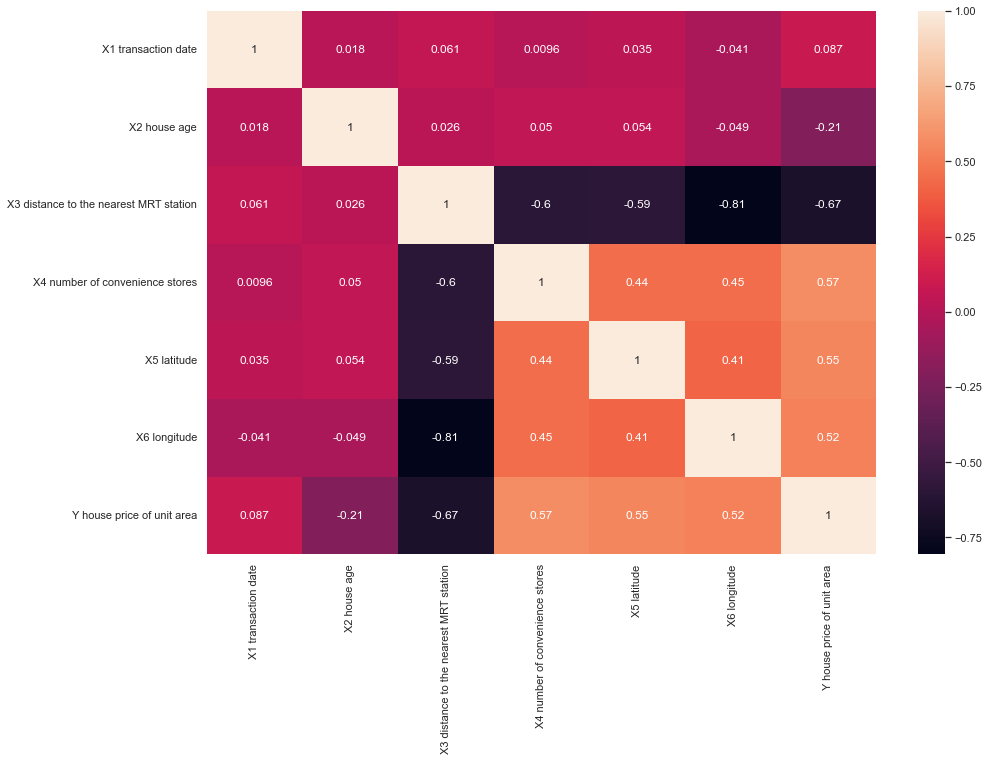

In [9]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(Data_Car.corr(),annot =True)

[Text(0.5, 1.0, 'number of convenience stores')]

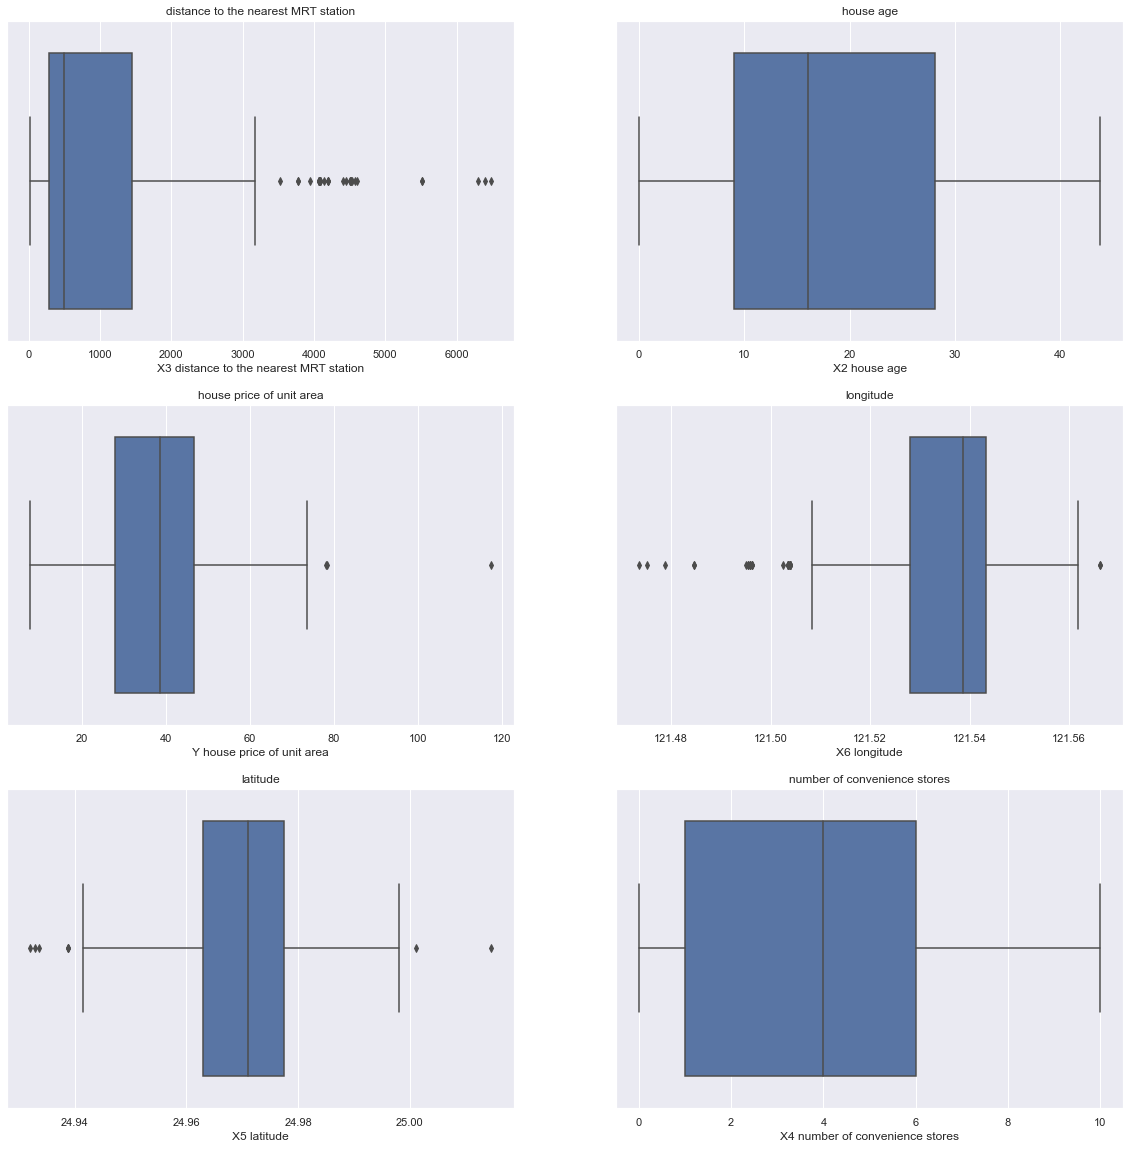

In [10]:

fig , axes = plt.subplots (3,2 , figsize = (20,20))
sns.boxplot (x= 'X3 distance to the nearest MRT station',data= Data_Car ,ax= axes[0,0]).set(title = 'distance to the nearest MRT station')
sns.boxplot (x= 'X2 house age',data= Data_Car ,ax= axes[0,1]).set(title = 'house age')
sns.boxplot (x= 'Y house price of unit area',data= Data_Car ,ax= axes[1,0]).set(title = 'house price of unit area')
sns.boxplot (x= 'X6 longitude',data= Data_Car ,ax= axes[1,1]).set(title = 'longitude')
sns.boxplot (x= 'X5 latitude',data= Data_Car ,ax= axes[2,0]).set(title = 'latitude')
sns.boxplot (x= 'X4 number of convenience stores',data= Data_Car ,ax= axes[2,1]).set(title = 'number of convenience stores')	

[Text(0.5, 1.0, 'distance to the nearest MRT station')]

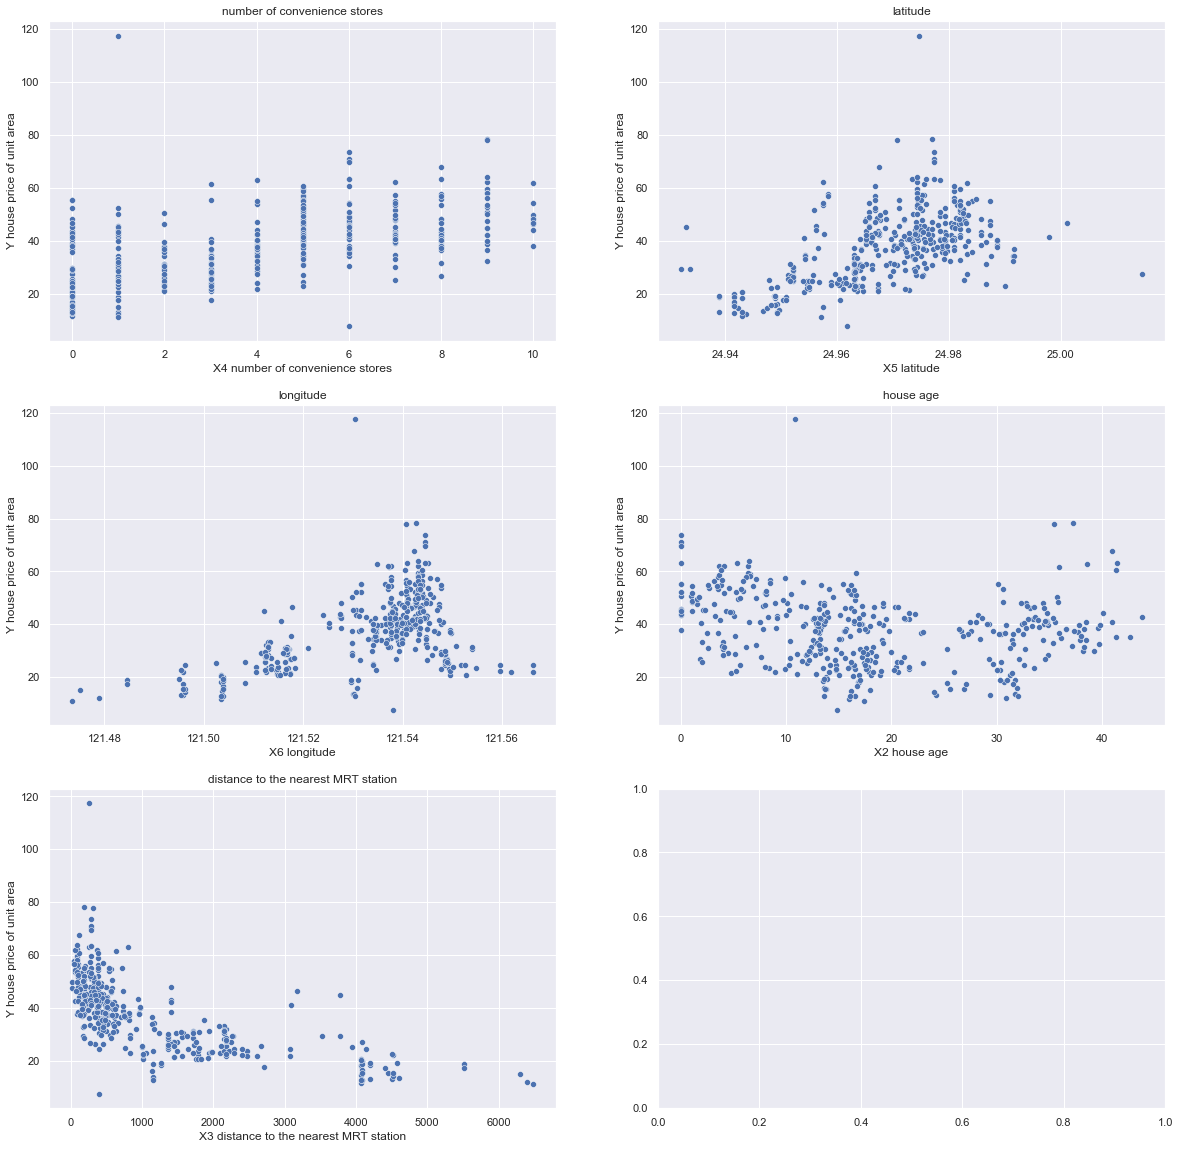

In [11]:
fig , axes =plt.subplots(3,2 , figsize=(20,20))
sns.scatterplot (x='X4 number of convenience stores',y='Y house price of unit area',data=Data_Car,ax = axes [0,0] ).set(title = 'number of convenience stores')
sns.scatterplot (x='X5 latitude',y='Y house price of unit area',data=Data_Car,ax = axes [0,1] ).set(title = 'latitude')
sns.scatterplot (x='X6 longitude',y='Y house price of unit area',data=Data_Car,ax = axes [1,0] ).set(title = 'longitude')
sns.scatterplot (x='X2 house age',y='Y house price of unit area',data=Data_Car,ax = axes [1,1] ).set(title = 'house age')
sns.scatterplot (x='X3 distance to the nearest MRT station',y='Y house price of unit area',data=Data_Car,ax = axes [2,0] ).set(title = 'distance to the nearest MRT station')



# conclusion
- the largest correlation between  house price of unit area and distance to the nearest MRT station , when distance to the nearest MRT station increase the house price derease
- house age is not more effect on thehouse price 
- the medium longitude and latitude have the greatest price  
- the dependancy of feature has less effiectivity on the the output , then we can predict the bias has large value comapred with the variance 



# Machine Learing 


In [12]:
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error , mean_squared_error 
from sklearn.model_selection import train_test_split 
from mlxtend.evaluate import bias_variance_decomp
import numpy as np 



In [13]:
x = Data_Car [['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']].values 
y = Data_Car ['Y house price of unit area'].values

In [14]:

def Select_Best_Degree (x,y): 
    degr =1
    #train the model 
    p_poly = PolynomialFeatures (degree= degr)
    x_poly = p_poly.fit_transform(x)

    xtrain , xtest , ytrain ,ytest = train_test_split (x_poly,y,test_size=0.2 , random_state= 20)

    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(xtrain,ytrain)

    y_pred = linear_reg.predict(xtest)

    avg_lossPre , avg_biasPre , avg_varPre = bias_variance_decomp(linear_reg ,xtrain,ytrain,xtest,ytest ,loss='mse' ,random_seed=20 , num_rounds= 200)

    Prev_Diff = avg_biasPre - avg_varPre 

    print ("Degree : ",degr)
    print(f"Mean Square Error : {avg_lossPre}")
    print (f"Bias Error :  {avg_biasPre}")
    print (f"Variance is : {avg_varPre}")
    print ('-----------------------------------------------------------------------------------------------')

    while(True) :
        degr+=1  
        p_poly = PolynomialFeatures (degree= degr)
        x_poly = p_poly.fit_transform(x)
        xtrain , xtest , ytrain ,ytest = train_test_split (x_poly,y,test_size=0.2 , random_state= 1 )
        
        linear_reg = linear_model.LinearRegression()
        linear_reg.fit(xtrain,ytrain)

        y_pred = linear_reg.predict(xtest)

        avg_lossUp , avg_biasUp , avg_varUp = bias_variance_decomp(linear_reg ,xtrain,ytrain,xtest,ytest ,loss='mse' ,random_seed=20 , num_rounds= 200)

        Up_Diff = avg_biasUp - avg_varUp 

        print ("Degree : ",degr)
        print(f"Mean Square Error : {avg_lossUp}")
        print (f"Bias Error :  {avg_biasUp}")
        print (f"Variance is : {avg_varUp}")   
        print ('-----------------------------------------------------------------------------------------------')
        
        if (avg_lossUp<avg_lossPre) and (Up_Diff < Prev_Diff) :
            avg_lossPre = avg_lossUp
            Prev_Diff = Up_Diff
        else : 
            return degr-1




In [15]:
Best_Degree = Select_Best_Degree (x,y)
print (f"The best Degree is : {Best_Degree}")

Degree :  1
Mean Square Error : 52.09030145986929
Bias Error :  50.14761249357459
Variance is : 1.9426889662946814
-----------------------------------------------------------------------------------------------
Degree :  2
Mean Square Error : 43.835362038565016
Bias Error :  37.68835726290606
Variance is : 6.147004775658959
-----------------------------------------------------------------------------------------------
Degree :  3
Mean Square Error : 235.44866150516148
Bias Error :  41.40100205809189
Variance is : 194.04765944706955
-----------------------------------------------------------------------------------------------
The best Degree is : 2
